Import all lib and dataset

In [20]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

dataSet = 'archives/heart.csv'
# Read the file and look at the head
data = pd.read_csv(dataSet)
data.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


unique values and shape

In [21]:
# uniqueVal = {column: data[column].nunique() for column in data.columns}

# for column in data.columns:
#     print(f"Unique values count in '{column}': {uniqueVal[column]}")

unique_counts = data.nunique()
print("unique Vals")
print(unique_counts)

unique Vals
age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


analyze the data abit

In [22]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
data.isnull().sum()


,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [24]:
correlations = data.corr()
print(correlations)


               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

In [25]:
grouped = data.groupby('age').median()
print(grouped)

     sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  \
age                                                                             
29   1.0  1.0   130.0  204.0  0.0      0.0     202.0   0.0     0.00  2.0  0.0   
34   0.5  2.0   118.0  196.0  0.0      0.5     183.0   0.0     0.35  2.0  0.0   
35   1.0  0.0   124.0  195.0  0.0      1.0     165.0   0.5     0.70  2.0  0.0   
37   0.5  2.0   125.0  232.5  0.0      1.0     178.5   0.0     1.75  1.0  0.0   
38   1.0  2.0   138.0  175.0  0.0      1.0     173.0   0.0     0.00  2.0  4.0   
39   0.5  2.0   128.0  219.5  0.0      1.0     165.5   0.0     0.00  1.5  0.0   
40   1.0  0.0   140.0  199.0  0.0      1.0     178.0   1.0     1.40  2.0  0.0   
41   1.0  1.0   116.0  209.0  0.0      1.0     168.0   0.0     0.00  2.0  0.0   
42   1.0  1.5   125.0  242.0  0.0      1.0     167.5   0.0     0.30  1.5  0.0   
43   1.0  0.0   126.0  247.0  0.0      1.0     161.5   0.0     1.35  1.0  0.0   
44   1.0  1.0   120.0  226.0

graphs and data representation

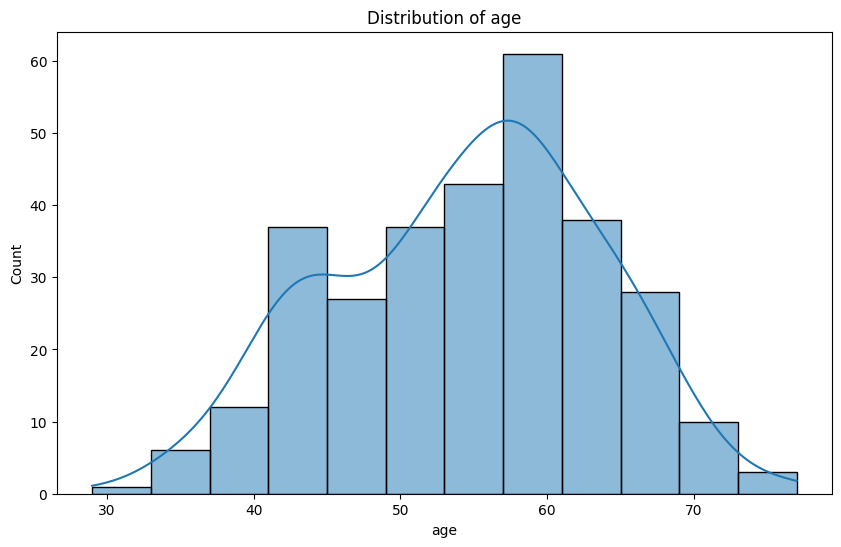

In [26]:
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of age')
plt.show()


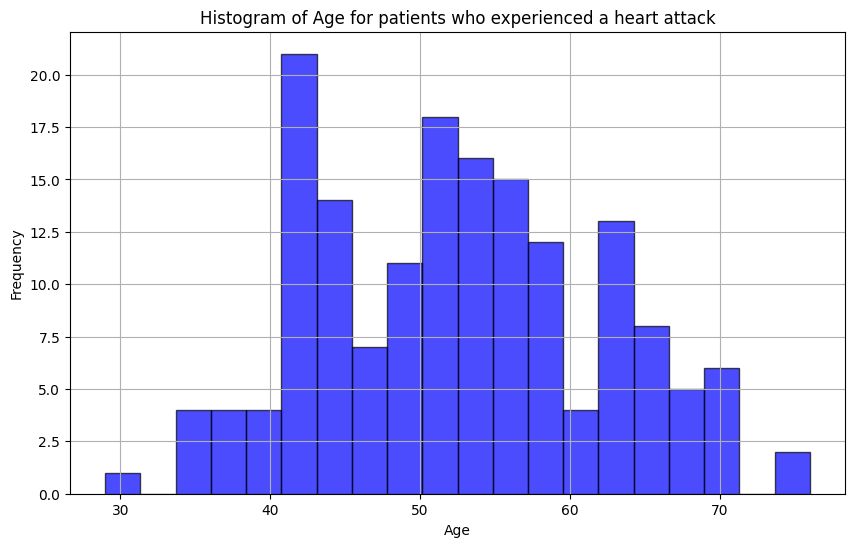

In [30]:
filtered_data = data[data['output'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age for patients who experienced a heart attack')
plt.grid(True)
plt.show()


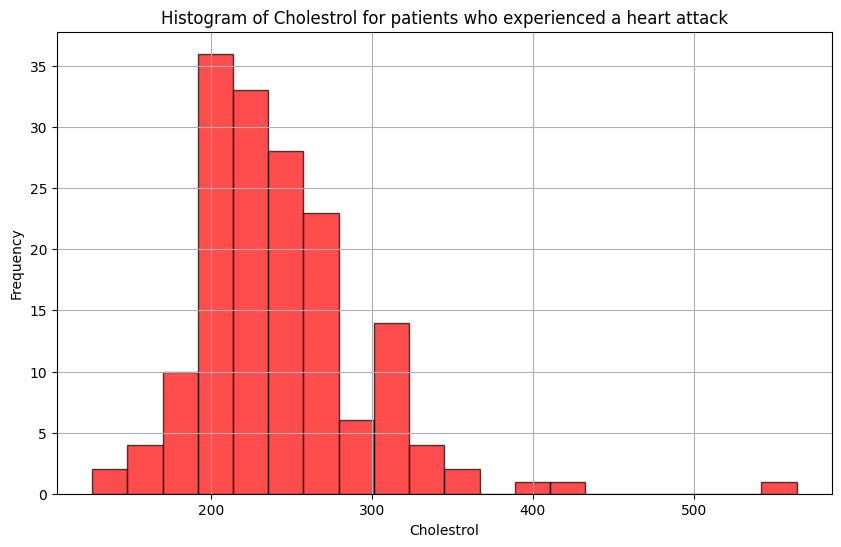

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['chol'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholestrol for patients who experienced a heart attack')
plt.grid(True)
plt.show()

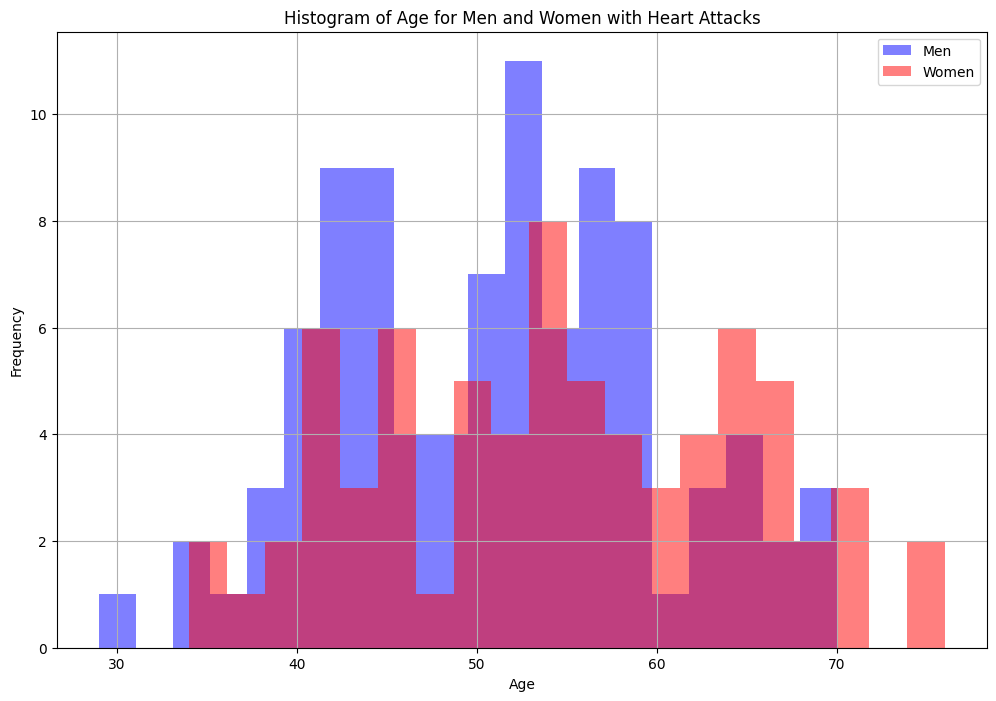

In [36]:
heart_attack_data = data[data['output'] == 1]
men_data = heart_attack_data[heart_attack_data['sex'] == 1]
women_data = heart_attack_data[heart_attack_data['sex'] == 0]

# Plot the histogram
plt.figure(figsize=(12, 8))

# Histogram for men
plt.hist(men_data['age'], bins=20, color='blue', alpha=0.5, label='Men')

# Histogram for women
plt.hist(women_data['age'], bins=20, color='red', alpha=0.5, label='Women')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age for Men and Women with Heart Attacks')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()